### 几何均值，算术均值，谐波，逆谐波处理

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

rows 448,cols 464


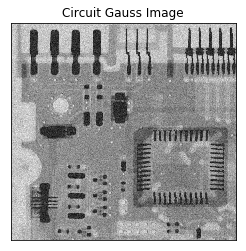

In [19]:
circuitGaussImg = cv2.imread('images/circuit_gauss.tif',0)
assert circuitGaussImg.ndim == 2, 'img should be gray.'
rows,cols = circuitGaussImg.shape[:2]
print('rows %s,cols %s' % (rows,cols))
plt.title('Circuit Gauss Image'), plt.xticks([]), plt.yticks([])
plt.imshow(circuitGaussImg, cmap = 'gray')

rows 448,cols 464


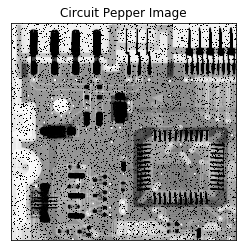

In [20]:
circuitPepperImg = cv2.imread('images/circuit_pepper.tif',0)
assert circuitPepperImg.ndim == 2, 'img should be gray.'
rows,cols = circuitPepperImg.shape[:2]
print('rows %s,cols %s' % (rows,cols))
plt.title('Circuit Pepper Image'), plt.xticks([]), plt.yticks([])
plt.imshow(circuitPepperImg, cmap = 'gray')

rows 448,cols 464


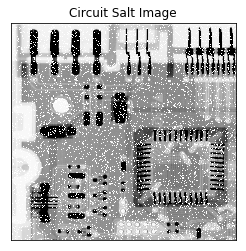

In [22]:
circuitSaltImg = cv2.imread('images/circuit_salt.tif',0)
assert circuitSaltImg.ndim == 2, 'img should be gray.'
rows,cols = circuitSaltImg.shape[:2]
print('rows %s,cols %s' % (rows,cols))
plt.title('Circuit Salt Image'), plt.xticks([]), plt.yticks([])
plt.imshow(circuitSaltImg, cmap = 'gray')

In [44]:
def GeometricMeanOperator(roi):
    roi = roi.astype(np.float64)
    p = np.prod(roi)
    return p**(1/(roi.shape[0]*roi.shape[1]))

In [45]:
def GeometricMeanFilter(image):
    newImage = np.zeros(image.shape)
    image = np.pad(image, ((1,1)), 'edge')
    rows,cols = image.shape[:2]
    for i in range (1, rows-1):
        for j in range (1, cols-1): 
            newImage[i-1,j-1] = GeometricMeanOperator(image[i-1:i+2,j-1:j+2])
    return newImage.astype(np.uint8)

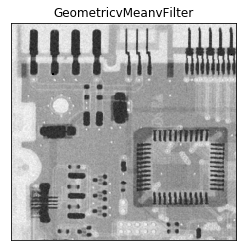

In [47]:
newImage = GeometricMeanFilter(circuitGaussImg)
plt.title('GeometricvMeanvFilter'), plt.xticks([]), plt.yticks([])
plt.imshow(newImage, cmap = 'gray')

In [48]:
def ArithmeticMeanOperator(roi):
    return np.mean(roi)

In [49]:
def ArithmeticMeanFilter(image):
    newImage = np.zeros(image.shape)
    image = np.pad(image, ((1,1)), 'edge')
    rows,cols = image.shape[:2]
    for i in range (1, rows-1):
        for j in range (1, cols-1): 
            newImage[i-1,j-1] = ArithmeticMeanOperator(image[i-1:i+2,j-1:j+2])
    return newImage.astype(np.uint8)

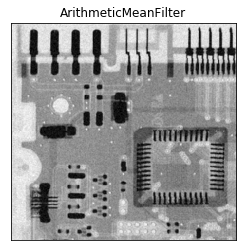

In [50]:
newImage = ArithmeticMeanFilter(circuitGaussImg)
plt.title('ArithmeticMeanFilter'), plt.xticks([]), plt.yticks([])
plt.imshow(newImage, cmap = 'gray')

In [39]:
arr1D = np.array([[1,2,3,4],[1,2,3,4],[1,2,3,4],[1,2,3,4]])
arr2D = arr1D
print(arr1D[:1])

[[1 2 3 4]]


In [31]:
arr1D = np.pad(arr1D, ((1,1)), 'edge')
print(arr1D)
print(arr2D)

[[1 1 2 3 4 4]
 [1 1 2 3 4 4]
 [1 1 2 3 4 4]
 [1 1 2 3 4 4]]
[[1 2 3 4]
 [1 2 3 4]]


In [34]:
arr = np.zeros((2,3)
print(arr)

[[0. 0. 0.]
 [0. 0. 0.]]
